# Notebook used to apply Lexicometry and BERTopic to the speeches related to heat pumps

In [14]:
#Import libraries
import pandas as pd
from discovery_utils import PROJECT_DIR
from datetime import datetime
import re
import dotenv

dotenv.load_dotenv();

In [2]:
#download the debatesfiles
file_path = PROJECT_DIR / 'policy_scanning/data/HansardDebates.parquet'

# Load the Parquet file into a DataFrame
df_speeches = pd.read_parquet(file_path)

In [3]:
#function to count the number of speeches held in each year
def count_speeches_per_year(year_column, start_year, end_year): 
    
    dict_speeches_per_year = {}
    for year in range(start_year, end_year):
        count = 0
        for item in year_column:
            if item == str(year):
                count +=1
        dict_speeches_per_year[f"{year}"] = count

    return  dict_speeches_per_year

In [4]:
#function used to normalise counts
def normalize_speech_count(dict1, dict2):
    normalized_result = {}
    for key, value in dict1.items():
        if key in dict2:
            normalized_result[key] = value / dict2[key]
    
    return normalized_result

In [5]:
#function to devide the dataset into 5 parliamentary terms
def divide_data_per_parliamentary_term(dataframe):
    dataframe['date'] = pd.to_datetime(dataframe['date'], format='%Y-%m-%d').dt.date

    #Step 1: create different datasets that include the speeches per presidential term
    list_2005_2010 = []
    list_2010_2015 = []
    list_2015_2017 = []
    list_2017_2019 = []
    list_2019_2024 = []

    #step 2, specify the start and end dates to divide the dataframe
    start_date_1 = datetime(2005, 5, 6).date()
    start_date_2 = datetime(2010, 5, 6).date()
    start_date_3 = datetime(2015, 5, 7).date()
    start_date_4 = datetime(2017, 6, 8).date()
    start_date_5 = datetime(2019, 7, 4).date()

    for index, row in dataframe.iterrows(): #change this because you are not using index xoxoxox
        if start_date_1 <= row['date'] <  start_date_2:
            list_2005_2010.append(row)
        elif start_date_2 <= row['date'] <  start_date_3:
            list_2010_2015.append(row)
        elif start_date_3 <= row['date'] <  start_date_4:
            list_2015_2017.append(row)
        elif start_date_4 <= row['date'] <  start_date_5:
            list_2017_2019.append(row)
        elif row['date'] >= start_date_5:
            list_2019_2024.append(row)

    df_2005_2010 = pd.DataFrame(list_2005_2010)
    df_2010_2015 = pd.DataFrame(list_2010_2015)
    df_2015_2017 = pd.DataFrame(list_2015_2017)
    df_2017_2019 = pd.DataFrame(list_2017_2019)
    df_2019_2024 = pd.DataFrame(list_2019_2024)

    return (df_2005_2010,df_2010_2015,df_2015_2017,df_2017_2019,df_2019_2024)

In [6]:
#Define function that can be used to filter out the speeches related to heat pump
def select_speeches(search_term, column_name, dataframe):
    list_speeches = []
    for index, row in dataframe.iterrows():
        speech = row[column_name]
        match = re.search(str(search_term), str(speech))
        if match:
            list_speeches.append(row)
    
    return list_speeches

## preprocessing

In [7]:
#Transform all the speeches to lowercase
def lower_case(speech):
    return speech.lower()

df_speeches['speech'] = df_speeches['speech'].apply(lower_case)


In [8]:
df_speeches.shape

(1222568, 10)

## Create dataframes for each parliamentary term

In [11]:
#Call divde_data_per_palriamentary_term function to divide the time frame into its 5 parliamentary terms
df_2005_2010,df_2010_2015,df_2015_2017,df_2017_2019,df_2019_2024 = divide_data_per_parliamentary_term(df_speeches)

In [12]:
#check the shape of the different parliamentary terms
print(df_2005_2010.shape)
print(df_2010_2015.shape)
print(df_2015_2017.shape)
print(df_2017_2019.shape)
print(df_2019_2024.shape)

(284189, 10)
(343291, 10)
(136481, 10)
(163342, 10)
(276713, 10)


In [15]:
#Filter out the speeches related to heat pump in every parliamentery term.
list_df_hp_1 = select_speeches('heat pump', 'speech', df_2005_2010)
list_df_hp_2 = select_speeches('heat pump', 'speech', df_2010_2015)
list_df_hp_3 = select_speeches('heat pump', 'speech', df_2015_2017)
list_df_hp_4 = select_speeches('heat pump', 'speech', df_2017_2019)
list_df_hp_5 = select_speeches('heat pump', 'speech', df_2019_2024)
list_hp_all_years = list_df_hp_1 + list_df_hp_2 + list_df_hp_3 + list_df_hp_4 + list_df_hp_5

#create dataframes of heatpump speeches
#Add a the year in which the speech was held + the name of the MP and the party of the MP to the speech (need this for further analysis)
hp_df_2005_2010 = pd.DataFrame(list_df_hp_1)
hp_df_2005_2010['speech'] = hp_df_2005_2010.apply(lambda row: row['speech'] + f"This speech was held in {row['year']} by {row['speakername']}. Party: {row['party_speaker']}",
    axis=1)
hp_df_2010_2015 = pd.DataFrame(list_df_hp_2)
hp_df_2010_2015['speech'] = hp_df_2010_2015.apply(lambda row: row['speech'] + f"This speech was held in {row['year']} by {row['speakername']}. Party: {row['party_speaker']}",
    axis=1)
hp_df_2015_2017 = pd.DataFrame(list_df_hp_3)
hp_df_2015_2017['speech'] = hp_df_2015_2017.apply(lambda row: row['speech'] + f"This speech was held in {row['year']} by {row['speakername']}. Party: {row['party_speaker']}",
    axis=1)
hp_df_2017_2019 = pd.DataFrame(list_df_hp_4)
hp_df_2017_2019['speech'] = hp_df_2017_2019.apply(lambda row: row['speech'] + f"This speech was held in {row['year']} by {row['speakername']}. Party: {row['party_speaker']}",
    axis=1)
hp_df_2019_2024 = pd.DataFrame(list_df_hp_5)
hp_df_2019_2024['speech'] = hp_df_2019_2024.apply(lambda row: row['speech'] + f"This speech was held in {row['year']} by {row['speakername']}. Party: {row['party_speaker']}",
    axis=1)

#creating a dataframe for the entire framework as that will allow for comparison with other research 
df_heat_pumps = pd.DataFrame(list_hp_all_years) 

In [16]:
#check the shape of the filtered heat pump datasets
print(hp_df_2005_2010.shape)
print(hp_df_2010_2015.shape)
print(hp_df_2015_2017.shape)
print(hp_df_2017_2019.shape)
print(hp_df_2019_2024.shape)

(68, 10)
(32, 10)
(5, 10)
(7, 10)
(180, 10)


# Select a random sample for evaluation of the attend_prompt

In [17]:
#compute the average length of speeches
sum = 0
for index, row in df_heat_pumps.iterrows():
    len_speech = len(row['speech'])
    sum += len_speech

average_len_speech = sum/292


In [18]:
import random #--> I have these speeches stored now in a word_document
# Define the range for "roughly the same as the average"
range_average = 0.1 * average_len_speech  # 10% range

#Create list with speeches divided by how long they are
short_speech = [item for item in df_heat_pumps['speech'] if len(item) < average_len_speech - range_average]
average_speech = [item for item in df_heat_pumps['speech'] if average_len_speech - range_average <= len(item) <= average_len_speech + range_average]
long_speech = [item for item in df_heat_pumps['speech'] if len(item) > average_len_speech + range_average]

#select a random sample of speeches to evaluate
low_sample = random.sample(short_speech, 5) 
av_sample = random.sample(average_speech, 5) 
high_sample = random.sample(long_speech, 5)

# Frequency analysis + Topic modelling

### Non-Normalized Trend analysis speeches containing the word heat pump(s)

In [19]:
hp_speeches_per_year = df_heat_pumps['year'].value_counts().sort_index()
hp_speeches_per_year

year
2005     2
2006    11
2007     4
2008    20
2009    26
2010    20
2011    10
2012     2
2013     4
2014     1
2016     3
2017     3
2018     2
2019     7
2020     9
2021    58
2022    36
2023    61
2024    13
Name: count, dtype: int64

In [20]:
dict_hp_per_year = hp_speeches_per_year.to_dict()

In [21]:
dict_speeches_per_year = count_speeches_per_year(df_speeches['year'], 2005,2025)
normalized_dict = normalize_speech_count(dict_hp_per_year, dict_speeches_per_year)

In [22]:
series = pd.Series(normalized_dict)

In [23]:
import matplotlib.pyplot as plt

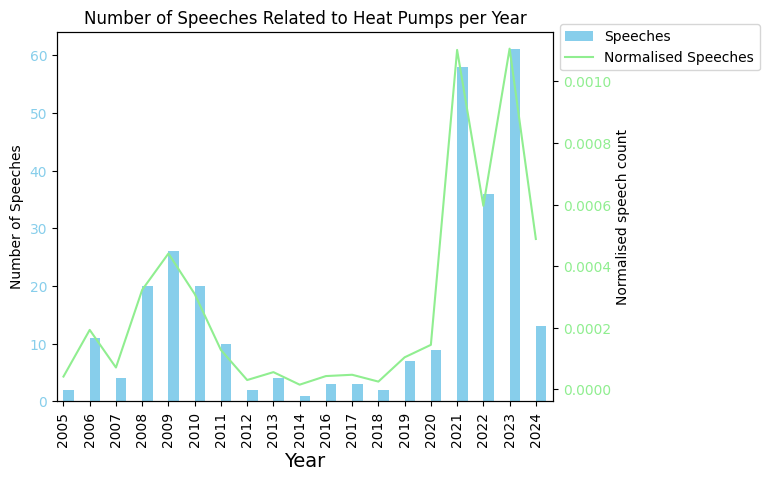

In [24]:
fig, ax1 = plt.subplots()

hp_speeches_per_year.plot(kind='bar', ax=ax1, color='skyblue', position=0, width=0.4, label='Speeches')
ax1.set_xlabel('Year', fontsize = 14)
ax1.set_ylabel('Number of Speeches', color='black')
ax1.set_title('Number of Speeches Related to Heat Pumps per Year')
ax1.tick_params(axis='y', labelcolor='skyblue')
# ax1.tick_params(axis='x', l)  # Increase the font size for the x-axis tick labels
ax1.tick_params(axis='y', labelcolor='skyblue')

# Create a second y-axis to plot the line graph
ax2 = ax1.twinx()
series.plot(kind='line', ax=ax2, color='lightgreen', label='Normalised Speeches')
ax2.set_ylabel('Normalised speech count', color='black')
ax2.tick_params(axis='y', labelcolor='lightgreen')

# Adding legend
fig.legend(loc="upper left", bbox_to_anchor=(0.9,0.91))

# Display the plot
plt.show()

# Proportion of speeches related to heat pumps per party

In [38]:
#Create a dictionary for the total amount of heat pump related speeches every party held
series_hp = df_heat_pumps['party_speaker'].value_counts()
hp_dict = series_hp.to_dict()

#Create a dictionary for the total amout of speeches every party held
series_all = df_speeches['party_speaker'].value_counts()
all_dict = series_all.to_dict()
all_dict

#Present the two dictionaries to the normilse_counts function normalise the number of speeches related to heat pumps
normalised_results = normalize_speech_count(hp_dict,all_dict)

In [41]:
series_hp_PT1 = hp_df_2005_2010['party_speaker'].value_counts()
hp_dict_PT1 = series_hp_PT1.to_dict()

series_total_PT1 = df_2005_2010['party_speaker'].value_counts()
total_dict_PT1 = series_total_PT1.to_dict()

normalised_results_PT1 = normalize_speech_count(hp_dict_PT1,total_dict_PT1)

In [26]:
hp_dict = series_hp.to_dict()

In [27]:
hp_dict

{'conservative': 136,
 'labour': 95,
 'liberal-democrat': 30,
 'scottish-national-party': 17,
 'labourco-operative': 4,
 'dup': 3,
 'independent': 3,
 'plaid-cymru': 2,
 'green': 2}

In [28]:
series_all = df_speeches['party_speaker'].value_counts()
all_dict = series_all.to_dict()
all_dict

{'conservative': 588113,
 'labour': 372426,
 'liberal-democrat': 71156,
 'scottish-national-party': 45056,
 'speaker': 32998,
 'labourco-operative': 18212,
 'dup': 15096,
 'deputy-speaker': 6392,
 'plaid-cymru': 5223,
 'independent': 5021,
 'social-democratic-and-labour-party': 3123,
 'green': 2147,
 'alliance': 781,
 'uup': 718,
 'alba': 427,
 'ukip': 352,
 'reclaim': 152,
 'respect': 145,
 'independent-labour': 44,
 'workers-party': 28,
 'reform': 10,
 'independent-conservative': 9}

In [39]:
normalised_results

{'conservative': 0.00023124807647509918,
 'labour': 0.0002550842314983379,
 'liberal-democrat': 0.000421608859407499,
 'scottish-national-party': 0.0003773082386363636,
 'labourco-operative': 0.00021963540522732265,
 'dup': 0.0001987281399046105,
 'independent': 0.0005974905397331209,
 'plaid-cymru': 0.0003829216925138809,
 'green': 0.0009315323707498836}

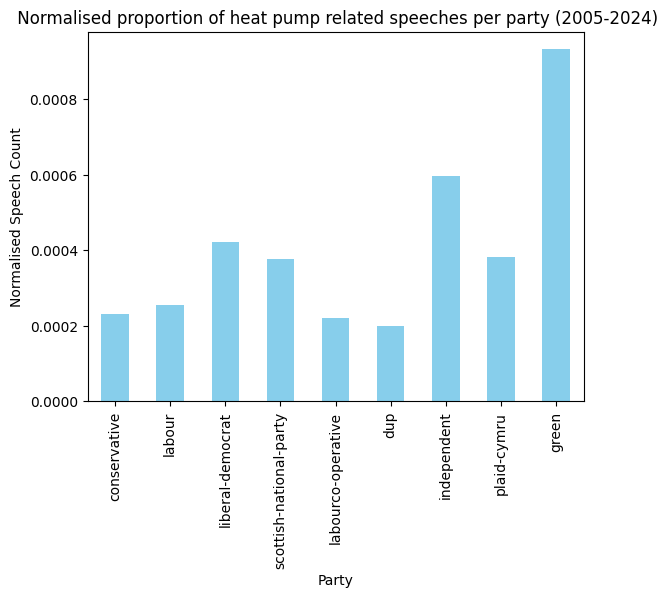

In [40]:
#Plot the normalised as a bar-graph
normalizes_series = pd.Series(normalised_results)
normalizes_series.plot(kind='bar', title=' Normalised proportion of heat pump related speeches per party (2005-2024)', color = 'skyblue')

plt.xlabel('Party')
plt.ylabel('Normalised Speech Count')

plt.show()

In [45]:
#calculate the proportion of speeches held per party per parliamenetary term

#Parliamentary term 1:
series_hp_PT1 = hp_df_2005_2010['party_speaker'].value_counts()
hp_dict_PT1 = series_hp_PT1.to_dict()

series_total_PT1 = df_2005_2010['party_speaker'].value_counts()
total_dict_PT1 = series_total_PT1.to_dict()

normalised_results_PT1 = normalize_speech_count(hp_dict_PT1,total_dict_PT1)

#Parliamentary term 2:
series_hp_PT2 = hp_df_2010_2015['party_speaker'].value_counts()
hp_dict_PT2 = series_hp_PT1.to_dict()

series_total_PT2 = df_2010_2015['party_speaker'].value_counts()
total_dict_PT2 = series_total_PT1.to_dict()

normalised_results_PT2 = normalize_speech_count(hp_dict_PT2,total_dict_PT2)

#Parliamentary term 3:
series_hp_PT3 = hp_df_2015_2017['party_speaker'].value_counts()
hp_dict_PT3 = series_hp_PT3.to_dict()

series_total_PT3 = df_2015_2017['party_speaker'].value_counts()
total_dict_PT3 = series_total_PT3.to_dict()

normalised_results_PT3 = normalize_speech_count(hp_dict_PT3,total_dict_PT3)

#Parliamentary term 4:
series_hp_PT4 = hp_df_2017_2019['party_speaker'].value_counts()
hp_dict_PT4 = series_hp_PT4.to_dict()

series_total_PT4 = df_2017_2019['party_speaker'].value_counts()
total_dict_PT4 = series_total_PT1.to_dict()

normalised_results_PT4 = normalize_speech_count(hp_dict_PT4,total_dict_PT4)

#Parliamentary term 5:
series_hp_PT5 = hp_df_2019_2024['party_speaker'].value_counts()
hp_dict_PT5 = series_hp_PT5.to_dict()

series_total_PT5 = df_2019_2024['party_speaker'].value_counts()
total_dict_PT5 = series_total_PT5.to_dict()

normalised_results_PT5 = normalize_speech_count(hp_dict_PT5,total_dict_PT5)

In [51]:
subplots= {'2005-2010': normalised_results_PT1,
              '2010-2015': normalised_results_PT2,
              '2015-2017': normalised_results_PT3,
              '2017-2019': normalised_results_PT4,
              '2019-2024': normalised_results_PT5

}

In [52]:
subplots

{'2005-2010': {'labour': 0.0002875518119270881,
  'liberal-democrat': 0.0005818012566907144,
  'conservative': 0.00013412017167381974,
  'scottish-national-party': 0.00035211267605633805},
 '2010-2015': {'labour': 0.0002875518119270881,
  'liberal-democrat': 0.0005818012566907144,
  'conservative': 0.00013412017167381974,
  'scottish-national-party': 0.00035211267605633805},
 '2015-2017': {'labour': 0.00010176735981546185,
  'conservative': 2.6033531188170364e-05},
 '2017-2019': {'conservative': 4.8770971517752635e-05,
  'labour': 2.104037648246986e-05},
 '2019-2024': {'conservative': 0.0006183988979029543,
  'labour': 0.0007722902266671816,
  'scottish-national-party': 0.0008346747749359089,
  'liberal-democrat': 0.0017438173747622067,
  'labourco-operative': 0.0005666525003541578,
  'dup': 0.0005774783445620789,
  'independent': 0.0013227513227513227,
  'plaid-cymru': 0.002072538860103627,
  'green': 0.0033333333333333335}}

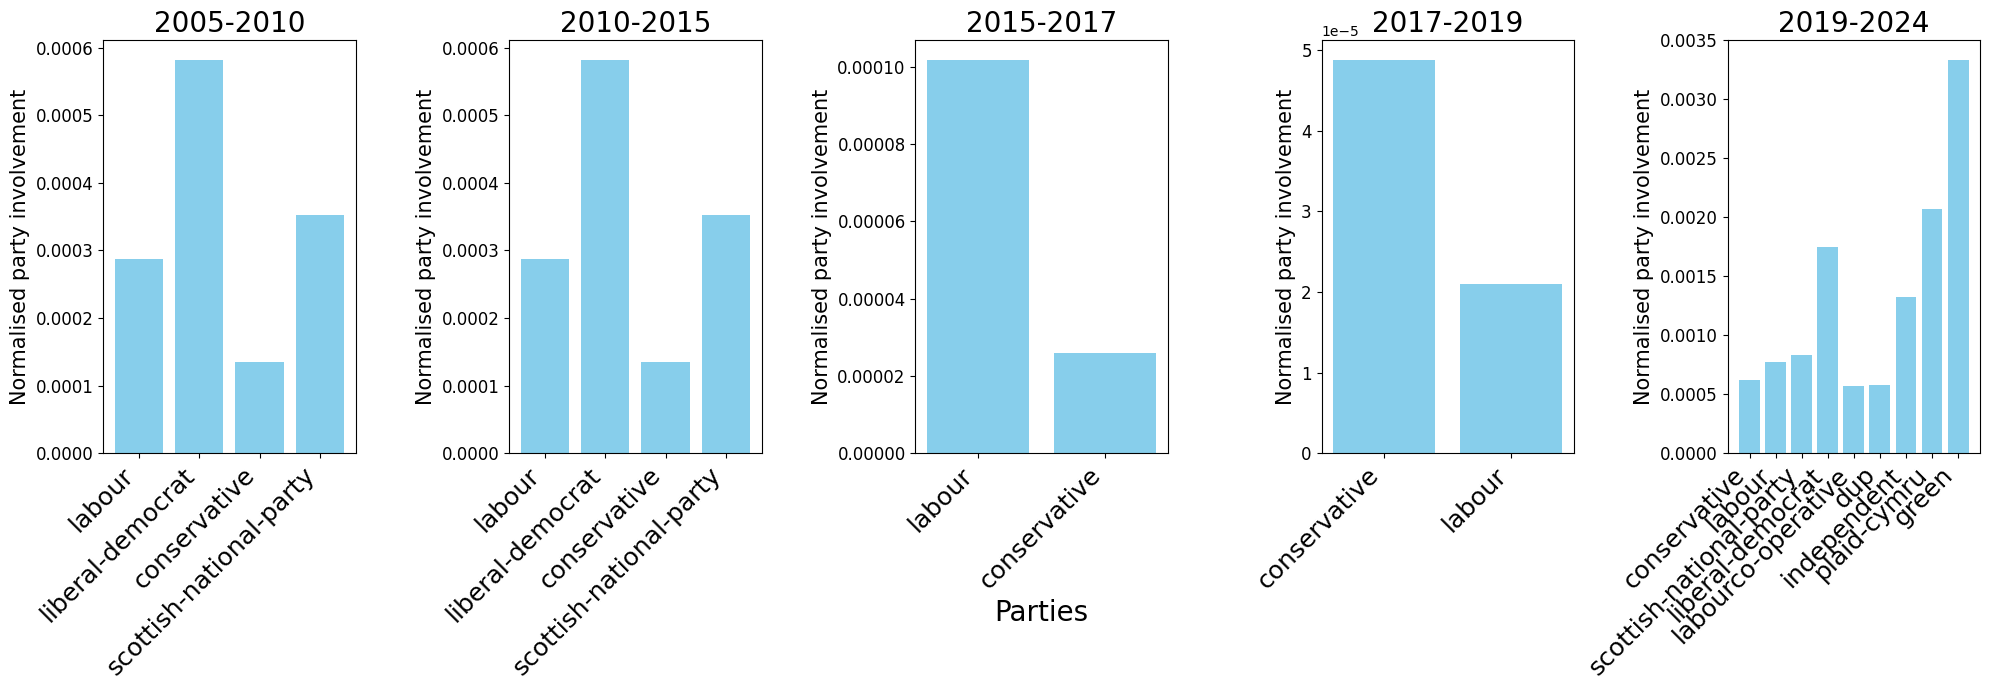

In [54]:
# Set up the plotting area
fig, axes = plt.subplots( ncols=5, figsize=(20, 7))

# Plot each series in a subplot
for ax, (series_name, series_data) in zip(axes, subplots.items()):
    parties = list(series_data.keys())
    values = list(series_data.values())
    
    ax.bar(parties, values, color='skyblue')
    ax.set_title(series_name, fontsize = 20)
    ax.set_ylabel('Normalised party involvement', fontsize = 15)

    ax.set_xticks(parties)
    ax.set_xticklabels(parties, rotation=45, ha='right', fontsize = 18)

    # Increase fontsize of y-axis values
    ax.tick_params(axis='y', labelsize=12)

# Set common x-label
axes[2].set_xlabel('Parties', fontsize = 20)

# Adjust layout for better spacing
plt.tight_layout()


# Save the plot
plt.savefig('my_plot.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Topic modelling

In [38]:
#create a list with all the sentences that contain heat pumps:
heat_pump_sentences = []
dates_hp_sentences = []
for index, row in df_heat_pumps.iterrows():
    speech = row['speech']
    single_sentences = re.split(r'(?<=[.!?]) +', speech.strip())
    for sentence in single_sentences:
        match = re.search('heat pump', sentence)
        if match:
            heat_pump_sentences.append(sentence)
            dates_hp_sentences.append(row['date'])   


In [39]:
!pip install --upgrade nbformat


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [40]:
!pip install bertopic


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [41]:
from bertopic import BERTopic


In [42]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer with English stop words
vectorizer_model = CountVectorizer(stop_words="english")

# Initialize BERTopic with the vectorizer model
topic_model = BERTopic(vectorizer_model=vectorizer_model)
topics, prob = topic_model.fit_transform(heat_pump_sentences)

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: sentence-transformers/all-MiniLM-L6-v2
INFO:sentence_transformers.SentenceTransformer:Use pytorch device_name: mps
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [43]:
# Print the topics and their corresponding probabilities
for idx, prob in enumerate(prob):
    print(f"Document {idx}: Topic {topics[idx]}, Probability: {prob}")

Document 0: Topic 2, Probability: 0.6181181350514878
Document 1: Topic 2, Probability: 0.6469423948180277
Document 2: Topic -1, Probability: 0.0
Document 3: Topic -1, Probability: 0.0
Document 4: Topic -1, Probability: 0.0
Document 5: Topic -1, Probability: 0.0
Document 6: Topic -1, Probability: 0.0
Document 7: Topic -1, Probability: 0.0
Document 8: Topic 8, Probability: 1.0
Document 9: Topic 0, Probability: 1.0
Document 10: Topic 0, Probability: 1.0
Document 11: Topic 0, Probability: 0.8409213650448947
Document 12: Topic 0, Probability: 1.0
Document 13: Topic 0, Probability: 0.8493906873939939
Document 14: Topic -1, Probability: 0.0
Document 15: Topic 2, Probability: 0.576089334831077
Document 16: Topic 5, Probability: 0.9546121155456082
Document 17: Topic -1, Probability: 0.0
Document 18: Topic -1, Probability: 0.0
Document 19: Topic -1, Probability: 0.0
Document 20: Topic -1, Probability: 0.0
Document 21: Topic 5, Probability: 0.9546121155456082
Document 22: Topic 1, Probability: 0.

In [44]:
topic_model.visualize_barchart(top_n_topics=len(set(topic_model.topics_)))

In [45]:
fig = topic_model.visualize_documents(heat_pump_sentences, width=800, height=500)

Batches: 100%|██████████| 14/14 [00:00<00:00, 16.44it/s]


In [46]:
fig

In [47]:
string_dates_hp_sentences = [str(item) for item in dates_hp_sentences]

In [48]:
#apply dynamic topic modelling using BERTopic
topics_over_time = topic_model.topics_over_time(heat_pump_sentences, string_dates_hp_sentences, nr_bins=20)


In [49]:
topic_model.visualize_topics_over_time(topics_over_time)